Image shape :  (512, 512)
Marker      :  (12, 23)
(0008, 0050) Accession Number                    SH: 'Anon55810'
(0008, 103e) Series Description                  LO: ' 2.5 ARTERIAL 1'
(0020, 1041) Slice Location                      DS: '-280.25'


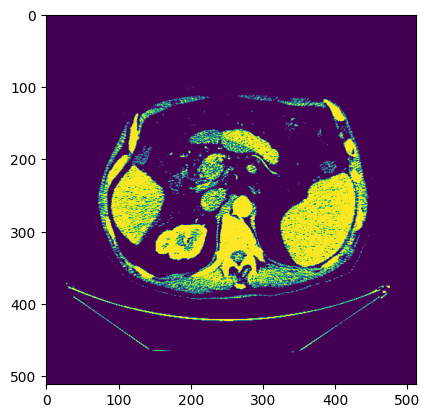

In [8]:
import torch
import pydicom
import matplotlib.pyplot as plt
import glob
import numpy as np
class pancreas():
    def __init__(self, root, slice, marker):
        self.slice=slice
        self.dcm=pydicom.dcmread(root + "/" + str(self.slice))
        self.location=self.dcm[("0020", "1041")].value
        self.img = self.dcm.pixel_array
        self.ac = self.dcm[("0008", "0050")].value
        self.sd = self.dcm[("0008", "103e")].value
        self.marker = marker
        self.info()
    def transform_to_hu(self, medical_image, image):
        intercept = medical_image.RescaleIntercept
        slope = medical_image.RescaleSlope
        hu_image = image * slope + intercept
        return hu_image
    def window_image(self, image, window_center, window_width):
        img_min = window_center - window_width // 2
        img_max = window_center + window_width // 2
        window_image = image.copy()
        window_image[window_image < img_min] = img_min
        window_image[window_image > img_max] = img_max
        return window_image
    def plot(self, window_center=40, window_width=80):
        hu_image = self.transform_to_hu(self.dcm, self.img)
        show_image = self.window_image(hu_image, window_center, window_center)
        plt.imshow(show_image)
    def info(self):
        self.dcm
        print("Image shape : ", self.img.shape)
        print("Marker      : ", self.marker)
        print(self.dcm[("0008", "0050")])
        print(self.dcm[("0008", "103e")])
        print(self.dcm[("0020", "1041")])
resect1=[460, 523, 2337, 2519]
path="/media/deeplearning/workspace/OUHSC_pancreas/resect1/DICOM"
resect1= pancreas(path, 1489, (12,23))
resect1.plot()


In [4]:
import SimpleITK as sitk
# Read the DICOM file
file_name = "/media/deeplearning/workspace/OUHSC_pancreas/resect2/DICOM/1516"
image = sitk.imread(file_name)

# Do something with the image...
# for example display the image
sitk.imshow(image)


AttributeError: module 'SimpleITK' has no attribute 'imread'

In [29]:
import SimpleITK as sitk
img = sitk.ReadImage("/media/deeplearning/workspace/OUHSC_pancreas/resect1/DICOM/460")
# rescale intensity range from [-1000,1000] to [0,255]
img = sitk.IntensityWindowing(img, -150, 250, 0, 255)
# convert 16-bit pixels to 8-bit
img = sitk.Cast(img, sitk.sitkUInt8)
sitk.WriteImage(img, "460.png")

In [6]:
import SimpleITK as sitk

# A file name that belongs to the series we want to read
file_name = '/media/deeplearning/workspace/OUHSC_pancreas/border1/DICOM/389'
file_name = '/media/deeplearning/workspace/OUHSC_pancreas/non4/DICOM/2843'

data_directory = '.'

# Read the file's meta-information without reading bulk pixel data
file_reader = sitk.ImageFileReader()
file_reader.SetFileName(file_name)
file_reader.ReadImageInformation()
for i in file_reader.GetMetaDataKeys():
    print(i,file_reader.GetMetaData(i))

0008|0005 ISO_IR 100
0008|0008 DERIVED\SECONDARY\3D\HD MIP 
0008|0012 20220318
0008|0013 141011
0008|0016 1.2.840.10008.5.1.4.1.1.7
0008|0018 1.3.6.1.4.1.23849.3931812574.1290.1638055740019089476
0008|0020 20220318
0008|0021 20220318
0008|0022 20220318
0008|0023 
0008|0030 134941
0008|0031 141011
0008|0032 135510.053972 
0008|0033 
0008|0050 Anon77929 
0008|0060 CT
0008|0064 WSD 
0008|0070 GE MEDICAL SYSTEMS
0008|0080 Anonymous institution 
0008|0081   
0008|0090   
0008|0092   
0008|0094   
0008|1010   
0008|1030 - CT RECIST ABD-PEL W-WO CONT 
0008|103e HD MIP
0008|1040   
0008|1048   
0008|1050   
0008|1060   
0008|1070   
0008|1090 LightSpeed VCT
0008|4000   
0010|0010 Anon77929 
0010|0020 X638055735802926334 
0010|0021 
0010|0030 19000101
0010|0032 1200
0010|0040 F 
0010|1000   
0010|1001   
0010|1005   
0010|1010 071Y
0010|1040   
0010|1060   
0010|1090   
0010|2154   
0010|2180   
0010|21b0   
0010|4000   
0018|0050 1.25
0018|1000 * 
0018|1010 oumcgect1ac 
0018|1012 20220318
0018

In [2]:
!pip install dicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.3/766.3 kB 13.6 MB/s eta 0:00:00a 0:00:01


In [13]:
for i in file_reader.GetMetaDataKeys():
    print(i,file_reader.GetMetaData(i))

0008|0005 ISO_IR 100
0008|0008 DERIVED\PRIMARY\AXIAL\CT_SOM5 MPR 
0008|0016 1.2.840.10008.5.1.4.1.1.2
0008|0018 1.3.6.1.4.1.23849.779270663.1653.1638055855757258268
0008|0020 20211021
0008|0021 20211021
0008|0022 20211021
0008|0023 20211021
0008|002a 20211021123656.325000 
0008|0030 122937.508
0008|0031 124509.264000 
0008|0032 123656.325000 
0008|0033 123656.325000 
0008|0050 Anon58954 
0008|0060 CT
0008|0070 SIEMENS 
0008|0080 Anonymous institution 
0008|0081   
0008|0090   
0008|0092   
0008|0094   
0008|1010   
0008|1030 - CT ABD AND PELV W-WO CONTRAST 
0008|103e COR ABD VEN STD 3 
0008|1040   
0008|1048   
0008|1050   
0008|1060   
0008|1070   
0008|1090 SOMATOM Drive 
0008|3010 1.3.12.2.1107.5.1.4.105402.30000021102115153382200000071
0008|4000   
0010|0010 Anon58954 
0010|0020 X638055851999446395 
0010|0021 
0010|0030 19000101
0010|0032 1200
0010|0040 M 
0010|1000   
0010|1001   
0010|1005   
0010|1010 076Y
0010|1040   
0010|1060   
0010|1090   
0010|2000 TX: PANCREATIC MASS 
001

In [4]:
import dicom
ds = dicom.read_file("/media/deeplearning/workspace/OUHSC_pancreas/resect2/DICOM/1516")

RuntimeError: generator raised StopIteration

In [11]:

dcm=pydicom.dcmread("/media/deeplearning/workspace/OUHSC_pancreas/resect2/DICOM/1516")

In [13]:
dcm=pydicom.dcmread("/media/deeplearning/workspace/OUHSC_pancreas/non4/DICOM/2843")
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.23849.3931812574.1290.1638055740019089476
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.23849.1
(0002, 0013) Implementation Version Name         SH: 'PACSGEAR_v3'
(0002, 0016) Source Application Entity Title     AE: 'OUMCACPGMW1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', '3D', 'HD MIP']
(0008, 0012) Instance Creation Date              DA: '20220318'
(0008, 0013) Instance Creation Time              TM: '141011'
(0008, 0016) S